# Car Accidents Severity in Seattle - Part1

This notbook is for capstone project

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
print('imported')

/Users/nastarandashti/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


imported


In [2]:
file_name='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df=pd.read_csv(file_name)
df.head()

/Users/nastarandashti/.pyenv/versions/3.7.3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.columns.values 

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [4]:
df.shape

(194673, 38)

In [5]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts()) 
    print("")  
#"True" stands for missing value, while "False" stands for not missing value.

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

# Cleaning data

Here we drop those coulmns that they have high number of missing values and also those ones we do not need for analyzing

In [6]:
df.drop(["SPEEDING","PEDROWNOTGRNT","INATTENTIONIND","EXCEPTRSNDESC","INTKEY",'EXCEPTRSNCODE',
         'SEVERITYCODE.1','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','LOCATION',
         'SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY'], axis=1, inplace=True)
df.shape

(194673, 19)

Lets see which kind of category each columens have:

In [7]:
columns=['SEVERITYCODE','SEVERITYDESC','COLLISIONTYPE','ADDRTYPE',  'JUNCTIONTYPE', 'WEATHER', 
 'ROADCOND','LIGHTCOND',  'UNDERINFL', 'HITPARKEDCAR','SDOT_COLCODE']

for col in columns:
    print(col)
    print(df[col].value_counts())
    print()

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

ADDRTYPE
Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

JUNCTIONTYPE
Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYP

Still in our data we have some of datas that are unknow/other or still missing, we need to take care of them:

In [8]:
df["UNDERINFL"] = df["UNDERINFL"].replace("N", 0)
df["UNDERINFL"] = df["UNDERINFL"].replace("0", 0)
df["UNDERINFL"] = df["UNDERINFL"].replace("1", 1)
df["UNDERINFL"] = df["UNDERINFL"].replace("Y", 1)

In [9]:
df = df.drop(df[df.COLLISIONTYPE == 'Other'].index)
df = df.drop(df[df.JUNCTIONTYPE == 'Unknown'].index)
df = df.drop(df[df.WEATHER == 'Unknown'].index)
df = df.drop(df[df.WEATHER == 'Other'].index)
df = df.drop(df[df.ROADCOND == 'Unknown'].index)
df = df.drop(df[df.ROADCOND == 'Other'].index)
df = df.drop(df[df.LIGHTCOND == 'Unknown'].index)
df = df.drop(df[df.LIGHTCOND == 'Other'].index)

In [10]:
df.dropna(inplace=True)

In [11]:
df.info

<bound method DataFrame.info of         SEVERITYCODE           X          Y      ADDRTYPE  \
0                  2 -122.323148  47.703140  Intersection   
1                  1 -122.347294  47.647172         Block   
2                  1 -122.334540  47.607871         Block   
4                  2 -122.306426  47.545739  Intersection   
5                  1 -122.387598  47.690575  Intersection   
...              ...         ...        ...           ...   
194668             2 -122.290826  47.565408         Block   
194669             1 -122.344526  47.690924         Block   
194670             2 -122.306689  47.683047  Intersection   
194671             2 -122.355317  47.678734  Intersection   
194672             1 -122.289360  47.611017         Block   

                          SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
0                     Injury Collision        Angles            2         0   
1       Property Damage Only Collision     Sideswipe            2         0  

# Balanceing

/Users/nastarandashti/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


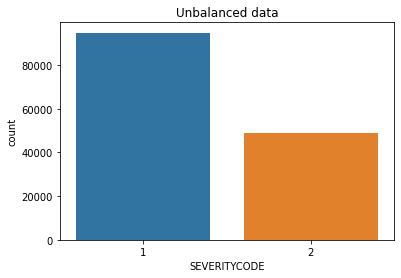

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 


sns.countplot('SEVERITYCODE', data=df)
plt.title('Unbalanced data')


plt.savefig('severity1.png', bbox_inches='tight')
plt.show()

In [13]:
df['SEVERITYCODE'].value_counts()

1    94821
2    48926
Name: SEVERITYCODE, dtype: int64

In [14]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    94821
Injury Collision                  48926
Name: SEVERITYDESC, dtype: int64

## Balanced data by RandomUnderSampler

1    48926
2    48926
Name: severity, dtype: int64


/Users/nastarandashti/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


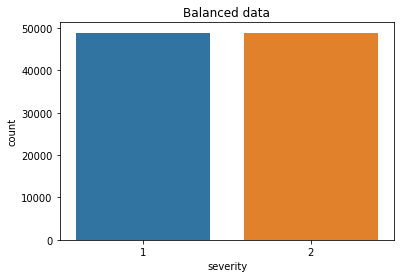

In [17]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

X = df[['X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT','PEDCOUNT',
       'VEHCOUNT','INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND','UNDERINFL','HITPARKEDCAR']]
y = df[['SEVERITYCODE']]

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
df_b = X_resampled
df_b['severity'] = y_resampled


print(df_b['severity'].value_counts())


import seaborn as sns
import matplotlib.pyplot as plt 


sns.countplot('severity', data=df_b)

plt.title('Balanced data')
plt.savefig('severity2.png', bbox_inches='tight')
plt.show()


In [18]:
#simple way for balanced data
#from sklearn.utils import resample
#df_max=df[df.SEVERITYCODE== 1]
#df_min=df[df.SEVERITYCODE== 2]
#df_max_resample= resample(df_max,replace=False, n_samples=49016)

#df_b = pd.concat([df_min ,df_max_resample ])
#import seaborn as sns
#import matplotlib.pyplot as plt 


#sns.countplot('SEVERITYDESC', data=df_b)

#plt.title('Balanced data')
#plt.savefig('severity2.png', bbox_inches='tight')
#plt.show()

# Analyzing Data

## Geographic details of severity 

Here we study the location of accidents for two typs of severity.

In [ ]:
pip install folium
print('Folium installed and imported!')

In [ ]:
import folium
from folium import plugins

latitude = df_b.Y.mean()
longitude = df_b.X.mean()

# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
collisions = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_b.Y, df_b.X, df_b.severity):
    folium.Marker(
        location=[lat, lng],
    ).add_to(collisions)

# display map
seattle_map

## Time

In [20]:
df_b.head()

,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,HITPARKEDCAR,severity
0,-122.313402,47.572363,Block,Rear Ended,2,0,2,2010/08/31 00:00:00+00,8/31/2010 6:50:00 PM,Mid-Block (not related to intersection),Raining,Wet,Dusk,0.0,N,1
1,-122.342842,47.613551,Block,Parked Car,2,0,2,2008/10/03 00:00:00+00,10/3/2008,Mid-Block (not related to intersection),Raining,Wet,Daylight,0.0,N,1
2,-122.293240,47.560808,Intersection,Left Turn,5,0,2,2016/08/13 00:00:00+00,8/13/2016 11:51:00 AM,At Intersection (intersection related),Clear,Dry,Daylight,0.0,N,1
3,-122.338651,47.607332,Block,Rear Ended,2,0,2,2005/06/11 00:00:00+00,6/11/2005 9:56:00 PM,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,0.0,N,1
4,-122.335740,47.649193,Block,Parked Car,2,0,2,2009/06/12 00:00:00+00,6/12/2009 2:20:00 PM,Mid-Block (not related to intersection),Clear,Dry,Daylight,0.0,N,1


In [21]:
df_b['INCDATE'] = pd.to_datetime(df_b['INCDATE'])
df_b['dayofweek'] = df_b['INCDATE'].dt.dayofweek
df_b['Year'] = pd.DatetimeIndex(df_b['INCDATE']).year 
df_b['month'] = pd.DatetimeIndex(df_b['INCDATE']).month
df_b.head()


,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,HITPARKEDCAR,severity,dayofweek,Year,month
0,-122.313402,47.572363,Block,Rear Ended,2,0,2,2010-08-31 00:00:00+00:00,8/31/2010 6:50:00 PM,Mid-Block (not related to intersection),Raining,Wet,Dusk,0.0,N,1,1,2010,8
1,-122.342842,47.613551,Block,Parked Car,2,0,2,2008-10-03 00:00:00+00:00,10/3/2008,Mid-Block (not related to intersection),Raining,Wet,Daylight,0.0,N,1,4,2008,10
2,-122.293240,47.560808,Intersection,Left Turn,5,0,2,2016-08-13 00:00:00+00:00,8/13/2016 11:51:00 AM,At Intersection (intersection related),Clear,Dry,Daylight,0.0,N,1,5,2016,8
3,-122.338651,47.607332,Block,Rear Ended,2,0,2,2005-06-11 00:00:00+00:00,6/11/2005 9:56:00 PM,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,0.0,N,1,5,2005,6
4,-122.335740,47.649193,Block,Parked Car,2,0,2,2009-06-12 00:00:00+00:00,6/12/2009 2:20:00 PM,Mid-Block (not related to intersection),Clear,Dry,Daylight,0.0,N,1,4,2009,6


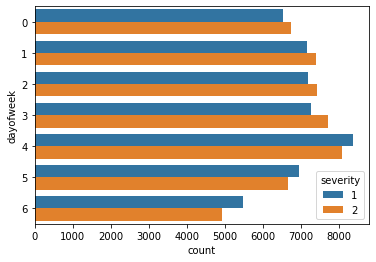

In [22]:
sns.countplot(y="dayofweek", hue="severity", data=df_b)
plt.savefig('week.png', bbox_inches='tight')

In [23]:
dummy = pd.get_dummies(df_b['severity'])
dummy.rename(columns={1:'Property-Damage_1',2:'Injury_2' }, inplace=True)
dummy['Year']=df_b['Year']
dummy.head()

,Property-Damage_1,Injury_2,Year
0,1,0,2010
1,1,0,2008
2,1,0,2016
3,1,0,2005
4,1,0,2009


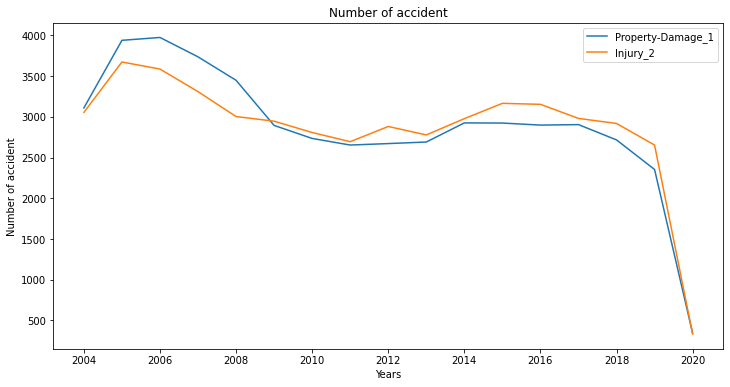

In [24]:
dummy_year= dummy.groupby('Year', axis=0).sum().astype(int)
dummy_year.plot(kind='line', figsize=(12, 6)) # pass a tuple (x, y) size
plt.title('Number of accident')
plt.ylabel('Number of accident')
plt.xlabel('Years')

plt.savefig('year.png')

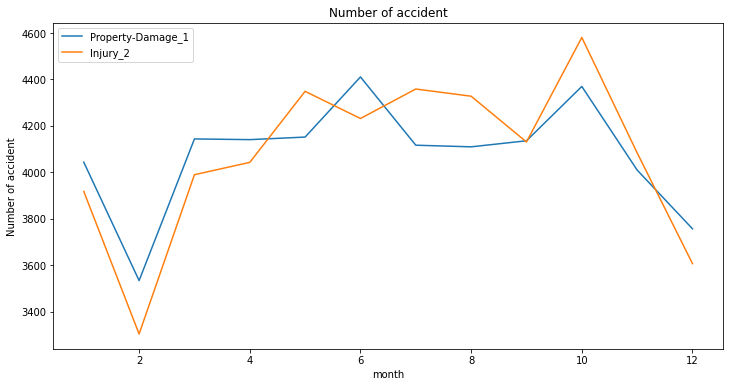

In [25]:
dummy1 = pd.get_dummies(df_b['severity'])
dummy1.rename(columns={1:'Property-Damage_1',2:'Injury_2'}, inplace=True)
dummy1['month']=df_b['month']

dummy_month= dummy1.groupby('month', axis=0).sum().astype(int)
dummy_month.plot(kind='line', figsize=(12, 6)) # pass a tuple (x, y) size
plt.title('Number of accident')
plt.ylabel('Number of accident')
plt.xlabel('month')


plt.savefig('month.png')
plt.show()

## Others

<AxesSubplot:xlabel='count', ylabel='LIGHTCOND'>

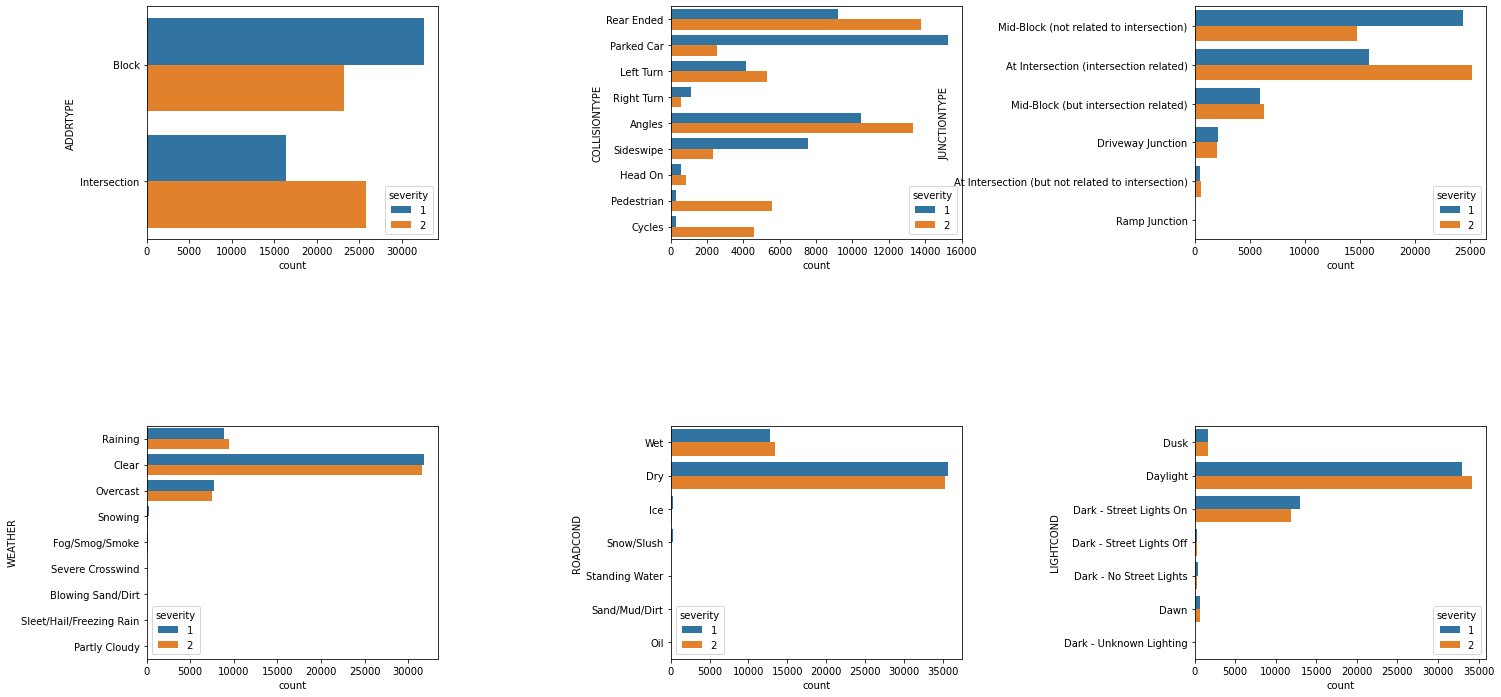

In [26]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)
sns.countplot(y="ADDRTYPE", hue="severity", data=df_b, ax=axs[0, 0])
sns.countplot(y="COLLISIONTYPE", hue="severity", data=df_b, ax=axs[0, 1])
sns.countplot(y="JUNCTIONTYPE", hue="severity", data=df_b, ax=axs[0, 2])
sns.countplot(y="WEATHER", hue="severity", data=df_b, ax=axs[1, 0])
sns.countplot(y="ROADCOND", hue="severity", data=df_b, ax=axs[1, 1])
sns.countplot(y="LIGHTCOND", hue="severity", data=df_b, ax=axs[1, 2])

#plt.savefig('file.png', bbox_inches='tight')
#sns.countplot(y="UNDERINFL", hue="severity", data=df_b, ax=axs[1, 2])

## Feature Selection 

In [3]:
df_b.columns.values 

array(['Unnamed: 0', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'HITPARKEDCAR',
       'severity', 'dayofweek', 'Year', 'month'], dtype=object)

In [4]:
#other way chi squared feature selection
# example of mutual information feature selection for categorical data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def calc_entropy(X, y, n):
    scores = []
    result = np.zeros(len(X.columns))
    
    for i in range(n):
        # split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
                # prepare input data
        X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
        # prepare output data
        y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
        # feature selection
        X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
        # what are scores for the features
        result = fs.scores_ + result
        
     return result / n

X = df_b.drop(columns=['X','Y', 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'severity','INCDATE', 'INCDTTM','UNDERINFL','HITPARKEDCAR'])
X = X.astype(str)
y = df_b['severity']

# Change the iteration number if you want to average the results
iterations = 1



result = calc_entropy(X, y, iterations)

for i in range(len(result)):
    print('Feature %s: %f' % (X.columns[i], result[i]))
# Plot the scores

sns.barplot(y=X.columns, x=result)

# Machine Learning

## Train Test Split

In [5]:
# Rename severity to 0:Property Damage ,1: injury
df_b["severity"] = df_b["severity"].replace(1, 0)
df_b["severity"] = df_b["severity"].replace(2, 1)
df_b["severity"].value_counts().to_frame()

,severity
0,48926
1,48926


In [6]:
# One hot encoding for the relevant dataset
feature = pd.concat([pd.get_dummies(df_b['WEATHER']), 
                     pd.get_dummies(df_b['ROADCOND']),
                     pd.get_dummies(df_b['LIGHTCOND'])], axis=1)
feature.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# Defining X matrix and y vector
X = feature
y = df_b['severity'].values

In [8]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78281, 23) (78281,)
Test set: (19571, 23) (19571,)


In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

In [13]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')

     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#print(confusion_matrix(y_test, yhat, labels=[1,0]))

## K Nearest Neighbor(KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    mean_acc[n-1]= accuracy_score(y_test, yhat);
    
mean_acc

array([0.50298912, 0.50355117, 0.50431761, 0.49982116, 0.49031731,
       0.50258035, 0.5134638 , 0.50365336, 0.50661693, 0.49542691,
       0.50656584, 0.51550764, 0.51412805, 0.50365336])

The best accuracy was with 0.5155076388534056 with k= 12


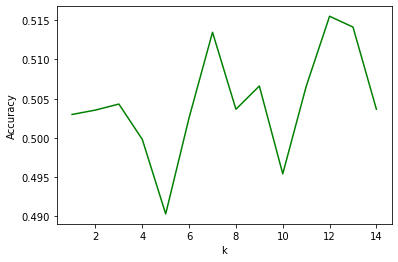

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('k')

plt.savefig('Accuracy.png')
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 



In [16]:
# Building the model again, using k=7
k = 6
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=6)

In [17]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [18]:
knn_yhat = kNN_model.predict(X_test)
print(classification_report(y_test, knn_yhat))
print("KNN accuracy_score: %.2f" % accuracy_score(y_test, knn_yhat))
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

              precision    recall  f1-score   support

           0       0.50      0.86      0.63      9748
           1       0.52      0.15      0.23      9823

    accuracy                           0.50     19571
   macro avg       0.51      0.50      0.43     19571
weighted avg       0.51      0.50      0.43     19571

KNN accuracy_score: 0.50
KNN Jaccard index: 0.13
KNN F1-score: 0.43


In [19]:
print(classification_report(y_test, knn_yhat))



              precision    recall  f1-score   support

           0       0.50      0.86      0.63      9748
           1       0.52      0.15      0.23      9823

    accuracy                           0.50     19571
   macro avg       0.51      0.50      0.43     19571
weighted avg       0.51      0.50      0.43     19571



[[1452 8371]
 [1364 8384]]


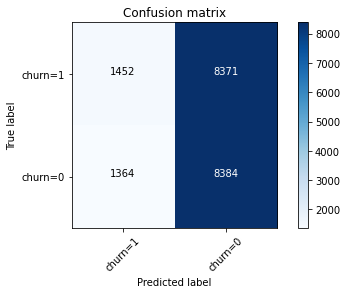

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, knn_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
plt.savefig('knn_M.png', bbox_inches='tight')

## Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
DT_yhat = DT_model.predict(X_test)
print(classification_report(y_test, DT_yhat))
print("DT accuracy_score: %.2f" % accuracy_score(y_test, DT_yhat))
print("DT Jaccard index: %.2f" % jaccard_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

              precision    recall  f1-score   support

           0       0.53      0.25      0.34      9748
           1       0.51      0.78      0.62      9823

    accuracy                           0.52     19571
   macro avg       0.52      0.52      0.48     19571
weighted avg       0.52      0.52      0.48     19571

DT accuracy_score: 0.52
DT Jaccard index: 0.45
DT F1-score: 0.48


[[7697 2126]
 [7307 2441]]


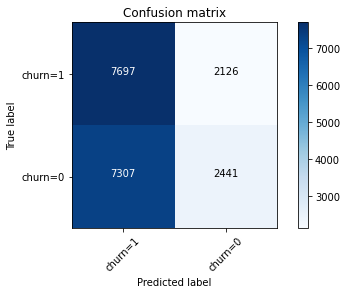

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, DT_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
plt.savefig('DT_M.png', bbox_inches='tight')

## Support Vector Machine

In [24]:
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train, y_train) 

SVC()

In [25]:
SVM_yhat = SVM_model.predict(X_test)
print(classification_report(y_test, SVM_yhat))
print("SVM accuracy_score: %.2f" % accuracy_score(y_test, SVM_yhat))
print("SVM Jaccard index: %.2f" % jaccard_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

              precision    recall  f1-score   support

           0       0.53      0.30      0.38      9748
           1       0.51      0.73      0.60      9823

    accuracy                           0.52     19571
   macro avg       0.52      0.52      0.49     19571
weighted avg       0.52      0.52      0.49     19571

SVM accuracy_score: 0.52
SVM Jaccard index: 0.43
SVM F1-score: 0.49


[[7155 2668]
 [6790 2958]]


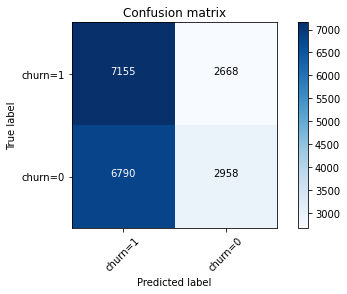

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, SVM_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
plt.savefig('SVM_M.png', bbox_inches='tight')

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.1).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.1)

In [28]:
LR_yhat = LR_model.predict(X_test)
print(classification_report(y_test, LR_yhat))
print("LR accuracy_score: %.2f" % accuracy_score(y_test, LR_yhat))
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )

              precision    recall  f1-score   support

           0       0.53      0.31      0.39      9748
           1       0.51      0.72      0.60      9823

    accuracy                           0.52     19571
   macro avg       0.52      0.52      0.50     19571
weighted avg       0.52      0.52      0.50     19571

LR accuracy_score: 0.52
LR Jaccard index: 0.43
LR F1-score: 0.50


[[7102 2721]
 [6721 3027]]


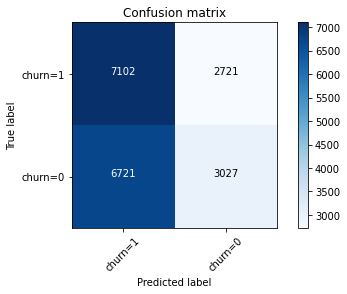

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LR_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
plt.savefig('LR_M.png', bbox_inches='tight')

## Random Forest¶

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier().fit(X_train,y_train)
RF_model

RandomForestClassifier()

In [31]:
RF_yhat = RF_model.predict(X_test)
print(classification_report(y_test, RF_yhat))
print("RF accuracy_score: %.2f" % accuracy_score(y_test, RF_yhat))
print("RF Jaccard index: %.2f" % jaccard_score(y_test, RF_yhat))
print("RF F1-score: %.2f" % f1_score(y_test, RF_yhat, average='weighted') )

              precision    recall  f1-score   support

           0       0.53      0.30      0.39      9748
           1       0.51      0.73      0.60      9823

    accuracy                           0.52     19571
   macro avg       0.52      0.52      0.49     19571
weighted avg       0.52      0.52      0.49     19571

RF accuracy_score: 0.52
RF Jaccard index: 0.43
RF F1-score: 0.49


[[7150 2673]
 [6781 2967]]


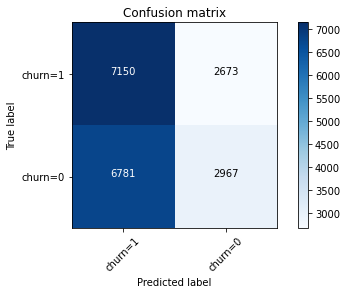

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, RF_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
plt.savefig('RF_M.png', bbox_inches='tight')

## Summery

| Algorithm          | Jaccard | F1-score | accuracy |
|--------------------|---------|----------|----------|
| KNN                | 0.40    | 0.51     | 0.51     |
| Decision Tree      | 0.45    | 0.48     | 0.52     |
| SVM                | 0.43    | 0.49     | 0.52     |
| LogisticRegression | 0.40    | 0.51     | 0.52     |
| Random Forest      | 0.43    | 0.49     | 0.52     |